# Big Mac Index

Based on The Economist's Big Mac Index: https://www.economist.com/big-mac-index

This project is a mix between translating R code into Python code, and performing my own version of their analysis on currency valuation/purchasing-power parity.

The idea behind the Big Mac Index is providing a general idea of how close currencys are to having the purchasing power they would have in an ideal ("perfect") situation.\
I find it to be a fun exercise to introduce people to some of the issues with exchange rates, and I wanted to further my understanding of it, as I had previously discussed it with my bestfriend, but wasn't sure of where the data originated from.

## Required Packages

Packages used throughout the notebook to perform all required actions.

In [1]:
import pandas as pd #Used for working with data
import statsmodels.formula.api as smf #used for performing statistical modelling
import matplotlib.pyplot as plt #Used for visualization
import seaborn as sns #Used for visualization

## Importing and Cleaning Data

Dataset downloaded from The Economist's GitHub: https://github.com/TheEconomist/big-mac-data

### Loadig the Data

Importing the data from a csv file.

In [2]:
df = pd.read_csv('big-mac-source-data-v2.csv') #Import the data from The Economist's Big Mac Index source file

### Data Labels Explanation

**name**: Complete country name.\
**iso_a3**: ISO code for the country.\
**currency_code**: International code for the country's currency.\
**local_price**: Big Mac price in local currency.\
**dollar_ex**: Currency exchange rate to dollars.\
**GDP_dollar**: GDP per capita in dollars.\
**GDP_local**: GDP per capita in local currency.\
**date**: Date when the data was recorded.\

In [3]:
df #Check the data

,name,iso_a3,currency_code,local_price,dollar_ex,GDP_dollar,GDP_local,date
0,Argentina,ARG,ARS,2.50,1.00000,8709.072,8.709072e+03,2000-04-01
1,Australia,AUS,AUD,2.59,1.68000,21746.809,3.369876e+04,2000-04-01
2,Brazil,BRA,BRL,2.95,1.79000,3501.438,6.351375e+03,2000-04-01
3,Canada,CAN,CAD,2.85,1.47000,22340.553,3.319147e+04,2000-04-01
4,Switzerland,CHE,CHF,5.90,1.70000,41859.215,6.287903e+04,2000-04-01
...,...,...,...,...,...,...,...,...
1941,Uruguay,URY,UYU,255.00,41.91000,16756.344,7.291942e+05,2022-07-01
1942,United States,USA,USD,5.15,1.00000,69231.400,6.923140e+04,2022-07-01
1943,Venezuela,VEN,VES,10.00,5.67320,1685.657,NaN,2022-07-01
1944,Vietnam,VNM,VND,69000.00,23417.00000,3724.543,8.542019e+07,2022-07-01


### Processing the Data

Removing blanks/nulls, sorting, and grouping the data.

In [4]:
#Remove Blank/Null rows
df.dropna(inplace = True)

In [5]:
#Sort by Date and Country Name
df.sort_values(by = ['date', 'name'], inplace = True)
df

,name,iso_a3,currency_code,local_price,dollar_ex,GDP_dollar,GDP_local,date
0,Argentina,ARG,ARS,2.50,1.000000,8709.072,8.709072e+03,2000-04-01
1,Australia,AUS,AUD,2.59,1.680000,21746.809,3.369876e+04,2000-04-01
2,Brazil,BRA,BRL,2.95,1.790000,3501.438,6.351375e+03,2000-04-01
10,Britain,GBR,GBP,1.90,0.632911,28733.206,1.775561e+04,2000-04-01
3,Canada,CAN,CAD,2.85,1.470000,22340.553,3.319147e+04,2000-04-01
...,...,...,...,...,...,...,...,...
1939,Turkey,TUR,TRY,47.00,17.565000,9527.683,8.448134e+04,2022-07-01
1876,United Arab Emirates,ARE,AED,18.00,3.673050,42883.686,1.574903e+05,2022-07-01
1942,United States,USA,USD,5.15,1.000000,69231.400,6.923140e+04,2022-07-01
1941,Uruguay,URY,UYU,255.00,41.910000,16756.344,7.291942e+05,2022-07-01


In [6]:
#Group by Date
df.groupby('date')
df

,name,iso_a3,currency_code,local_price,dollar_ex,GDP_dollar,GDP_local,date
0,Argentina,ARG,ARS,2.50,1.000000,8709.072,8.709072e+03,2000-04-01
1,Australia,AUS,AUD,2.59,1.680000,21746.809,3.369876e+04,2000-04-01
2,Brazil,BRA,BRL,2.95,1.790000,3501.438,6.351375e+03,2000-04-01
10,Britain,GBR,GBP,1.90,0.632911,28733.206,1.775561e+04,2000-04-01
3,Canada,CAN,CAD,2.85,1.470000,22340.553,3.319147e+04,2000-04-01
...,...,...,...,...,...,...,...,...
1939,Turkey,TUR,TRY,47.00,17.565000,9527.683,8.448134e+04,2022-07-01
1876,United Arab Emirates,ARE,AED,18.00,3.673050,42883.686,1.574903e+05,2022-07-01
1942,United States,USA,USD,5.15,1.000000,69231.400,6.923140e+04,2022-07-01
1941,Uruguay,URY,UYU,255.00,41.910000,16756.344,7.291942e+05,2022-07-01


## Calculating the Raw Big Mac Index

Currency Valuation Index (vs. the Dollar) using the Big Mac price of each country as the point of reference.

In [7]:
#Get the price of a Big Mac in Dollars
df['dollar_price'] = df['local_price'] / df['dollar_ex']
df

,name,iso_a3,currency_code,local_price,dollar_ex,GDP_dollar,GDP_local,date,dollar_price
0,Argentina,ARG,ARS,2.50,1.000000,8709.072,8.709072e+03,2000-04-01,2.500000
1,Australia,AUS,AUD,2.59,1.680000,21746.809,3.369876e+04,2000-04-01,1.541667
2,Brazil,BRA,BRL,2.95,1.790000,3501.438,6.351375e+03,2000-04-01,1.648045
10,Britain,GBR,GBP,1.90,0.632911,28733.206,1.775561e+04,2000-04-01,3.002000
3,Canada,CAN,CAD,2.85,1.470000,22340.553,3.319147e+04,2000-04-01,1.938776
...,...,...,...,...,...,...,...,...,...
1939,Turkey,TUR,TRY,47.00,17.565000,9527.683,8.448134e+04,2022-07-01,2.675776
1876,United Arab Emirates,ARE,AED,18.00,3.673050,42883.686,1.574903e+05,2022-07-01,4.900559
1942,United States,USA,USD,5.15,1.000000,69231.400,6.923140e+04,2022-07-01,5.150000
1941,Uruguay,URY,UYU,255.00,41.910000,16756.344,7.291942e+05,2022-07-01,6.084467


In [8]:
#Create a copy of the dataframe to get the USD price of a Big Mac for each date
df_usd = df.loc[df['currency_code'] == 'USD'].copy()
df_usd

,name,iso_a3,currency_code,local_price,dollar_ex,GDP_dollar,GDP_local,date,dollar_price
26,United States,USA,USD,2.24,1.0,34496.241,34496.241,2000-04-01,2.24
54,United States,USA,USD,2.24,1.0,36312.782,36312.782,2001-04-01,2.24
86,United States,USA,USD,2.35,1.0,37101.453,37101.453,2002-04-01,2.35
118,United States,USA,USD,2.46,1.0,37945.761,37945.761,2003-04-01,2.46
158,United States,USA,USD,2.47,1.0,39405.354,39405.354,2004-05-01,2.47
199,United States,USA,USD,2.58,1.0,41641.617,41641.617,2005-06-01,2.58
231,United States,USA,USD,2.67,1.0,44034.256,44034.256,2006-01-01,2.67
272,United States,USA,USD,2.78,1.0,44034.256,44034.256,2006-05-01,2.78
313,United States,USA,USD,2.89,1.0,46216.853,46216.853,2007-01-01,2.89
354,United States,USA,USD,3.00,1.0,46216.853,46216.853,2007-06-01,3.00


In [9]:
#Remove unnecessary columns
df_usd_dropped = df_usd[['local_price', 'date']]
df_usd_dropped

,local_price,date
26,2.24,2000-04-01
54,2.24,2001-04-01
86,2.35,2002-04-01
118,2.46,2003-04-01
158,2.47,2004-05-01
199,2.58,2005-06-01
231,2.67,2006-01-01
272,2.78,2006-05-01
313,2.89,2007-01-01
354,3.00,2007-06-01


In [10]:
#Create new dataframe with the USD price of each date as a new column
df_new = pd.merge(df,df_usd_dropped, on= 'date')
df_new

,name,iso_a3,currency_code,local_price_x,dollar_ex,GDP_dollar,GDP_local,date,dollar_price,local_price_y
0,Argentina,ARG,ARS,2.50,1.000000,8709.072,8.709072e+03,2000-04-01,2.500000,2.24
1,Australia,AUS,AUD,2.59,1.680000,21746.809,3.369876e+04,2000-04-01,1.541667,2.24
2,Brazil,BRA,BRL,2.95,1.790000,3501.438,6.351375e+03,2000-04-01,1.648045,2.24
3,Britain,GBR,GBP,1.90,0.632911,28733.206,1.775561e+04,2000-04-01,3.002000,2.24
4,Canada,CAN,CAD,2.85,1.470000,22340.553,3.319147e+04,2000-04-01,1.938776,2.24
...,...,...,...,...,...,...,...,...,...,...
1913,Turkey,TUR,TRY,47.00,17.565000,9527.683,8.448134e+04,2022-07-01,2.675776,5.15
1914,United Arab Emirates,ARE,AED,18.00,3.673050,42883.686,1.574903e+05,2022-07-01,4.900559,5.15
1915,United States,USA,USD,5.15,1.000000,69231.400,6.923140e+04,2022-07-01,5.150000,5.15
1916,Uruguay,URY,UYU,255.00,41.910000,16756.344,7.291942e+05,2022-07-01,6.084467,5.15


In [11]:
#Rename "local_price_y" column to "USD_price"
df_new.rename(columns = {'local_price_y':'USD_price'}, inplace = True)
df_new

,name,iso_a3,currency_code,local_price_x,dollar_ex,GDP_dollar,GDP_local,date,dollar_price,USD_price
0,Argentina,ARG,ARS,2.50,1.000000,8709.072,8.709072e+03,2000-04-01,2.500000,2.24
1,Australia,AUS,AUD,2.59,1.680000,21746.809,3.369876e+04,2000-04-01,1.541667,2.24
2,Brazil,BRA,BRL,2.95,1.790000,3501.438,6.351375e+03,2000-04-01,1.648045,2.24
3,Britain,GBR,GBP,1.90,0.632911,28733.206,1.775561e+04,2000-04-01,3.002000,2.24
4,Canada,CAN,CAD,2.85,1.470000,22340.553,3.319147e+04,2000-04-01,1.938776,2.24
...,...,...,...,...,...,...,...,...,...,...
1913,Turkey,TUR,TRY,47.00,17.565000,9527.683,8.448134e+04,2022-07-01,2.675776,5.15
1914,United Arab Emirates,ARE,AED,18.00,3.673050,42883.686,1.574903e+05,2022-07-01,4.900559,5.15
1915,United States,USA,USD,5.15,1.000000,69231.400,6.923140e+04,2022-07-01,5.150000,5.15
1916,Uruguay,URY,UYU,255.00,41.910000,16756.344,7.291942e+05,2022-07-01,6.084467,5.15


In [12]:
#Create new column ("raw_index") with the calculated Big Mac Raw Index
df_new['raw_index'] = (df_new['dollar_price'] / df_new['USD_price']) - 1
df_new

,name,iso_a3,currency_code,local_price_x,dollar_ex,GDP_dollar,GDP_local,date,dollar_price,USD_price,raw_index
0,Argentina,ARG,ARS,2.50,1.000000,8709.072,8.709072e+03,2000-04-01,2.500000,2.24,0.116071
1,Australia,AUS,AUD,2.59,1.680000,21746.809,3.369876e+04,2000-04-01,1.541667,2.24,-0.311756
2,Brazil,BRA,BRL,2.95,1.790000,3501.438,6.351375e+03,2000-04-01,1.648045,2.24,-0.264266
3,Britain,GBR,GBP,1.90,0.632911,28733.206,1.775561e+04,2000-04-01,3.002000,2.24,0.340179
4,Canada,CAN,CAD,2.85,1.470000,22340.553,3.319147e+04,2000-04-01,1.938776,2.24,-0.134475
...,...,...,...,...,...,...,...,...,...,...,...
1913,Turkey,TUR,TRY,47.00,17.565000,9527.683,8.448134e+04,2022-07-01,2.675776,5.15,-0.480432
1914,United Arab Emirates,ARE,AED,18.00,3.673050,42883.686,1.574903e+05,2022-07-01,4.900559,5.15,-0.048435
1915,United States,USA,USD,5.15,1.000000,69231.400,6.923140e+04,2022-07-01,5.150000,5.15,0.000000
1916,Uruguay,URY,UYU,255.00,41.910000,16756.344,7.291942e+05,2022-07-01,6.084467,5.15,0.181450


## Calculating the Adjusted Big Mac Index 

Currency Valuation Index (vs. the Dollar) using the Big Mac price of each country as the point of reference, and correcting for puchasing-power disparities using exchange rates created using Big Mac prices, and GDPs calculated with them.

### Big Mac Exchange Rate

Exchange rate calculated using Big Mac prices

In [13]:
#Calculate the monetary exchange rate ("ex_rate") based on the price of the Big Mac in local currency and USD
df_new['ex_rate'] = df_new['local_price_x'] / df_new['USD_price']
df_new

,name,iso_a3,currency_code,local_price_x,dollar_ex,GDP_dollar,GDP_local,date,dollar_price,USD_price,raw_index,ex_rate
0,Argentina,ARG,ARS,2.50,1.000000,8709.072,8.709072e+03,2000-04-01,2.500000,2.24,0.116071,1.116071
1,Australia,AUS,AUD,2.59,1.680000,21746.809,3.369876e+04,2000-04-01,1.541667,2.24,-0.311756,1.156250
2,Brazil,BRA,BRL,2.95,1.790000,3501.438,6.351375e+03,2000-04-01,1.648045,2.24,-0.264266,1.316964
3,Britain,GBR,GBP,1.90,0.632911,28733.206,1.775561e+04,2000-04-01,3.002000,2.24,0.340179,0.848214
4,Canada,CAN,CAD,2.85,1.470000,22340.553,3.319147e+04,2000-04-01,1.938776,2.24,-0.134475,1.272321
...,...,...,...,...,...,...,...,...,...,...,...,...
1913,Turkey,TUR,TRY,47.00,17.565000,9527.683,8.448134e+04,2022-07-01,2.675776,5.15,-0.480432,9.126214
1914,United Arab Emirates,ARE,AED,18.00,3.673050,42883.686,1.574903e+05,2022-07-01,4.900559,5.15,-0.048435,3.495146
1915,United States,USA,USD,5.15,1.000000,69231.400,6.923140e+04,2022-07-01,5.150000,5.15,0.000000,1.000000
1916,Uruguay,URY,UYU,255.00,41.910000,16756.344,7.291942e+05,2022-07-01,6.084467,5.15,0.181450,49.514563


### Big Mac GDP

GDP calculated using the Big Mac Exchange Rate.

In [14]:
#Calculate each country's GDP based on the GDP in local currency and the exchange rate determined using Big Mac prices
df_new['GDP_bigmac'] = df_new['GDP_local'] / df_new['ex_rate']
df_new

,name,iso_a3,currency_code,local_price_x,dollar_ex,GDP_dollar,GDP_local,date,dollar_price,USD_price,raw_index,ex_rate,GDP_bigmac
0,Argentina,ARG,ARS,2.50,1.000000,8709.072,8.709072e+03,2000-04-01,2.500000,2.24,0.116071,1.116071,7803.328512
1,Australia,AUS,AUD,2.59,1.680000,21746.809,3.369876e+04,2000-04-01,1.541667,2.24,-0.311756,1.156250,29144.876973
2,Brazil,BRA,BRL,2.95,1.790000,3501.438,6.351375e+03,2000-04-01,1.648045,2.24,-0.264266,1.316964,4822.738983
3,Britain,GBR,GBP,1.90,0.632911,28733.206,1.775561e+04,2000-04-01,3.002000,2.24,0.340179,0.848214,20932.924968
4,Canada,CAN,CAD,2.85,1.470000,22340.553,3.319147e+04,2000-04-01,1.938776,2.24,-0.134475,1.272321,26087.329235
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,Turkey,TUR,TRY,47.00,17.565000,9527.683,8.448134e+04,2022-07-01,2.675776,5.15,-0.480432,9.126214,9256.997784
1914,United Arab Emirates,ARE,AED,18.00,3.673050,42883.686,1.574903e+05,2022-07-01,4.900559,5.15,-0.048435,3.495146,45059.735594
1915,United States,USA,USD,5.15,1.000000,69231.400,6.923140e+04,2022-07-01,5.150000,5.15,0.000000,1.000000,69231.400000
1916,Uruguay,URY,UYU,255.00,41.910000,16756.344,7.291942e+05,2022-07-01,6.084467,5.15,0.181450,49.514563,14726.863618


### Working with the Latest Data Available

Eliminates the need for correcting for inflation.

In [15]:
#Determine latest date in data
latest_date = df_new['date'].max()
latest_date

'2022-07-01'

In [16]:
#Create a copy of the "df_new" dataframe sliced so it only has the latest date
df_latest = df_new.loc[df_new['date'] == latest_date].copy()
df_latest

,name,iso_a3,currency_code,local_price_x,dollar_ex,GDP_dollar,GDP_local,date,dollar_price,USD_price,raw_index,ex_rate,GDP_bigmac
1850,Argentina,ARG,ARS,590.00,129.115000,10658.458,1.013547e+06,2022-07-01,4.569570,5.15,-0.112705,114.563107,8847.066934
1851,Australia,AUS,AUD,6.70,1.448436,63529.289,8.450524e+04,2022-07-01,4.625680,5.15,-0.101810,1.300971,64955.518761
1852,Austria,AUT,EUR,4.35,0.975850,53367.540,4.509196e+04,2022-07-01,4.457652,5.15,-0.134436,0.844660,53384.740172
1853,Azerbaijan,AZE,AZN,4.70,1.698250,5397.928,9.176478e+03,2022-07-01,2.767555,5.15,-0.462611,0.912621,10055.076957
1854,Bahrain,BHR,BHD,1.60,0.377000,26135.777,9.827052e+03,2022-07-01,4.244032,5.15,-0.175916,0.310680,31630.823625
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,Turkey,TUR,TRY,47.00,17.565000,9527.683,8.448134e+04,2022-07-01,2.675776,5.15,-0.480432,9.126214,9256.997784
1914,United Arab Emirates,ARE,AED,18.00,3.673050,42883.686,1.574903e+05,2022-07-01,4.900559,5.15,-0.048435,3.495146,45059.735594
1915,United States,USA,USD,5.15,1.000000,69231.400,6.923140e+04,2022-07-01,5.150000,5.15,0.000000,1.000000,69231.400000
1916,Uruguay,URY,UYU,255.00,41.910000,16756.344,7.291942e+05,2022-07-01,6.084467,5.15,0.181450,49.514563,14726.863618


### Linear Regression Model and Adjusted Price Prediction

Linear regression model used to predict the price that a Big Mac would have if the country/currency had the correct valuation.

In [17]:
#Linear regression model to determine the adjusted price of the Big Mac based on "GDP_bigmac"
df_reg_latest = smf.ols('dollar_price ~ GDP_bigmac', data = df_latest).fit()
df_reg_latest.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           dollar_price   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     13.44
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           0.000493
Time:                        20:18:04   Log-Likelihood:                -90.795
No. Observations:                  68   AIC:                             185.6
Df Residuals:                      66   BIC:                             190.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3440      0.190     17.638      0.000       2.965       3.723
GDP_bigmac  1.737e-05   4.74e-06      3.666      0.000    7.91e-06    2.68e-05
==============================================================================
Omnibus:                        0.803   Durbin-Watson:                   1.614
Prob(Omnibus):                  0.669   Jarque-Bera (JB):                0.280
Skew:                           0.041   Prob(JB):                        0.869
Kurtosis:                       3.304   Cond. No.                     6.70e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
#Predict the adjusted big mac price ("adj_price") using the regression model
df_latest['adj_price'] = df_reg_latest.predict(df_latest)
df_latest

,name,iso_a3,currency_code,local_price_x,dollar_ex,GDP_dollar,GDP_local,date,dollar_price,USD_price,raw_index,ex_rate,GDP_bigmac,adj_price
1850,Argentina,ARG,ARS,590.00,129.115000,10658.458,1.013547e+06,2022-07-01,4.569570,5.15,-0.112705,114.563107,8847.066934,3.497672
1851,Australia,AUS,AUD,6.70,1.448436,63529.289,8.450524e+04,2022-07-01,4.625680,5.15,-0.101810,1.300971,64955.518761,4.472139
1852,Austria,AUT,EUR,4.35,0.975850,53367.540,4.509196e+04,2022-07-01,4.457652,5.15,-0.134436,0.844660,53384.740172,4.271183
1853,Azerbaijan,AZE,AZN,4.70,1.698250,5397.928,9.176478e+03,2022-07-01,2.767555,5.15,-0.462611,0.912621,10055.076957,3.518652
1854,Bahrain,BHR,BHD,1.60,0.377000,26135.777,9.827052e+03,2022-07-01,4.244032,5.15,-0.175916,0.310680,31630.823625,3.893370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,Turkey,TUR,TRY,47.00,17.565000,9527.683,8.448134e+04,2022-07-01,2.675776,5.15,-0.480432,9.126214,9256.997784,3.504791
1914,United Arab Emirates,ARE,AED,18.00,3.673050,42883.686,1.574903e+05,2022-07-01,4.900559,5.15,-0.048435,3.495146,45059.735594,4.126598
1915,United States,USA,USD,5.15,1.000000,69231.400,6.923140e+04,2022-07-01,5.150000,5.15,0.000000,1.000000,69231.400000,4.546401
1916,Uruguay,URY,UYU,255.00,41.910000,16756.344,7.291942e+05,2022-07-01,6.084467,5.15,0.181450,49.514563,14726.863618,3.599789


### Setting the Adjusted USD Price Column

Creates the required referrence point for the next steps in the analysis.

In [19]:
#Create a copy of the dataframe just containing the date's USD data
df_usd_latest = df_latest.loc[df_latest['currency_code'] == 'USD'].copy()
df_usd_latest

,name,iso_a3,currency_code,local_price_x,dollar_ex,GDP_dollar,GDP_local,date,dollar_price,USD_price,raw_index,ex_rate,GDP_bigmac,adj_price
1915,United States,USA,USD,5.15,1.0,69231.4,69231.4,2022-07-01,5.15,5.15,0.0,1.0,69231.4,4.546401


In [20]:
#Remove unnecessary columns
df_usd_latest_dropped = df_usd_latest[['date', 'adj_price']]
df_usd_latest_dropped

,date,adj_price
1915,2022-07-01,4.546401


In [21]:
#Merge dataframes to include the adjusted big mac price in USD as a new column
df_latest_new = pd.merge(df_latest,df_usd_latest_dropped, on= 'date')
df_latest_new

,name,iso_a3,currency_code,local_price_x,dollar_ex,GDP_dollar,GDP_local,date,dollar_price,USD_price,raw_index,ex_rate,GDP_bigmac,adj_price_x,adj_price_y
0,Argentina,ARG,ARS,590.00,129.115000,10658.458,1.013547e+06,2022-07-01,4.569570,5.15,-0.112705,114.563107,8847.066934,3.497672,4.546401
1,Australia,AUS,AUD,6.70,1.448436,63529.289,8.450524e+04,2022-07-01,4.625680,5.15,-0.101810,1.300971,64955.518761,4.472139,4.546401
2,Austria,AUT,EUR,4.35,0.975850,53367.540,4.509196e+04,2022-07-01,4.457652,5.15,-0.134436,0.844660,53384.740172,4.271183,4.546401
3,Azerbaijan,AZE,AZN,4.70,1.698250,5397.928,9.176478e+03,2022-07-01,2.767555,5.15,-0.462611,0.912621,10055.076957,3.518652,4.546401
4,Bahrain,BHR,BHD,1.60,0.377000,26135.777,9.827052e+03,2022-07-01,4.244032,5.15,-0.175916,0.310680,31630.823625,3.893370,4.546401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Turkey,TUR,TRY,47.00,17.565000,9527.683,8.448134e+04,2022-07-01,2.675776,5.15,-0.480432,9.126214,9256.997784,3.504791,4.546401
64,United Arab Emirates,ARE,AED,18.00,3.673050,42883.686,1.574903e+05,2022-07-01,4.900559,5.15,-0.048435,3.495146,45059.735594,4.126598,4.546401
65,United States,USA,USD,5.15,1.000000,69231.400,6.923140e+04,2022-07-01,5.150000,5.15,0.000000,1.000000,69231.400000,4.546401,4.546401
66,Uruguay,URY,UYU,255.00,41.910000,16756.344,7.291942e+05,2022-07-01,6.084467,5.15,0.181450,49.514563,14726.863618,3.599789,4.546401


In [22]:
#Rename columns to improve dataframe readability
df_latest_new.rename(columns = {'adj_price_y':'adj_USD_price', 'local_price_x':'local_price', 'adj_price_x':'adj_dollar_price'}, inplace = True)
df_latest_new

,name,iso_a3,currency_code,local_price,dollar_ex,GDP_dollar,GDP_local,date,dollar_price,USD_price,raw_index,ex_rate,GDP_bigmac,adj_dollar_price,adj_USD_price
0,Argentina,ARG,ARS,590.00,129.115000,10658.458,1.013547e+06,2022-07-01,4.569570,5.15,-0.112705,114.563107,8847.066934,3.497672,4.546401
1,Australia,AUS,AUD,6.70,1.448436,63529.289,8.450524e+04,2022-07-01,4.625680,5.15,-0.101810,1.300971,64955.518761,4.472139,4.546401
2,Austria,AUT,EUR,4.35,0.975850,53367.540,4.509196e+04,2022-07-01,4.457652,5.15,-0.134436,0.844660,53384.740172,4.271183,4.546401
3,Azerbaijan,AZE,AZN,4.70,1.698250,5397.928,9.176478e+03,2022-07-01,2.767555,5.15,-0.462611,0.912621,10055.076957,3.518652,4.546401
4,Bahrain,BHR,BHD,1.60,0.377000,26135.777,9.827052e+03,2022-07-01,4.244032,5.15,-0.175916,0.310680,31630.823625,3.893370,4.546401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Turkey,TUR,TRY,47.00,17.565000,9527.683,8.448134e+04,2022-07-01,2.675776,5.15,-0.480432,9.126214,9256.997784,3.504791,4.546401
64,United Arab Emirates,ARE,AED,18.00,3.673050,42883.686,1.574903e+05,2022-07-01,4.900559,5.15,-0.048435,3.495146,45059.735594,4.126598,4.546401
65,United States,USA,USD,5.15,1.000000,69231.400,6.923140e+04,2022-07-01,5.150000,5.15,0.000000,1.000000,69231.400000,4.546401,4.546401
66,Uruguay,URY,UYU,255.00,41.910000,16756.344,7.291942e+05,2022-07-01,6.084467,5.15,0.181450,49.514563,14726.863618,3.599789,4.546401


### Calculating the Adjusted Big Mac Index

Calcuation of the Big Mac Index using all of the required corrections/modelled data.

In [23]:
#Calculate the deviation ("dev") that the adjusted price has from the real price for each country (in dollars)
df_latest_new['dev'] = df_latest_new['dollar_price'] / df_latest_new['adj_dollar_price']
df_latest_new

,name,iso_a3,currency_code,local_price,dollar_ex,GDP_dollar,GDP_local,date,dollar_price,USD_price,raw_index,ex_rate,GDP_bigmac,adj_dollar_price,adj_USD_price,dev
0,Argentina,ARG,ARS,590.00,129.115000,10658.458,1.013547e+06,2022-07-01,4.569570,5.15,-0.112705,114.563107,8847.066934,3.497672,4.546401,1.306461
1,Australia,AUS,AUD,6.70,1.448436,63529.289,8.450524e+04,2022-07-01,4.625680,5.15,-0.101810,1.300971,64955.518761,4.472139,4.546401,1.034333
2,Austria,AUT,EUR,4.35,0.975850,53367.540,4.509196e+04,2022-07-01,4.457652,5.15,-0.134436,0.844660,53384.740172,4.271183,4.546401,1.043658
3,Azerbaijan,AZE,AZN,4.70,1.698250,5397.928,9.176478e+03,2022-07-01,2.767555,5.15,-0.462611,0.912621,10055.076957,3.518652,4.546401,0.786538
4,Bahrain,BHR,BHD,1.60,0.377000,26135.777,9.827052e+03,2022-07-01,4.244032,5.15,-0.175916,0.310680,31630.823625,3.893370,4.546401,1.090066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Turkey,TUR,TRY,47.00,17.565000,9527.683,8.448134e+04,2022-07-01,2.675776,5.15,-0.480432,9.126214,9256.997784,3.504791,4.546401,0.763462
64,United Arab Emirates,ARE,AED,18.00,3.673050,42883.686,1.574903e+05,2022-07-01,4.900559,5.15,-0.048435,3.495146,45059.735594,4.126598,4.546401,1.187554
65,United States,USA,USD,5.15,1.000000,69231.400,6.923140e+04,2022-07-01,5.150000,5.15,0.000000,1.000000,69231.400000,4.546401,4.546401,1.132764
66,Uruguay,URY,UYU,255.00,41.910000,16756.344,7.291942e+05,2022-07-01,6.084467,5.15,0.181450,49.514563,14726.863618,3.599789,4.546401,1.690229


In [24]:
#Calculate the adjusted Big Mac index ("adj_index")
df_latest_new['adj_index'] = (df_latest_new['dev'] / (df_latest_new['USD_price'] / df_latest_new['adj_USD_price'])) - 1
df_latest_new

,name,iso_a3,currency_code,local_price,dollar_ex,GDP_dollar,GDP_local,date,dollar_price,USD_price,raw_index,ex_rate,GDP_bigmac,adj_dollar_price,adj_USD_price,dev,adj_index
0,Argentina,ARG,ARS,590.00,129.115000,10658.458,1.013547e+06,2022-07-01,4.569570,5.15,-0.112705,114.563107,8847.066934,3.497672,4.546401,1.306461,0.153339
1,Australia,AUS,AUD,6.70,1.448436,63529.289,8.450524e+04,2022-07-01,4.625680,5.15,-0.101810,1.300971,64955.518761,4.472139,4.546401,1.034333,-0.086895
2,Austria,AUT,EUR,4.35,0.975850,53367.540,4.509196e+04,2022-07-01,4.457652,5.15,-0.134436,0.844660,53384.740172,4.271183,4.546401,1.043658,-0.078663
3,Azerbaijan,AZE,AZN,4.70,1.698250,5397.928,9.176478e+03,2022-07-01,2.767555,5.15,-0.462611,0.912621,10055.076957,3.518652,4.546401,0.786538,-0.305647
4,Bahrain,BHR,BHD,1.60,0.377000,26135.777,9.827052e+03,2022-07-01,4.244032,5.15,-0.175916,0.310680,31630.823625,3.893370,4.546401,1.090066,-0.037693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Turkey,TUR,TRY,47.00,17.565000,9527.683,8.448134e+04,2022-07-01,2.675776,5.15,-0.480432,9.126214,9256.997784,3.504791,4.546401,0.763462,-0.326018
64,United Arab Emirates,ARE,AED,18.00,3.673050,42883.686,1.574903e+05,2022-07-01,4.900559,5.15,-0.048435,3.495146,45059.735594,4.126598,4.546401,1.187554,0.048369
65,United States,USA,USD,5.15,1.000000,69231.400,6.923140e+04,2022-07-01,5.150000,5.15,0.000000,1.000000,69231.400000,4.546401,4.546401,1.132764,0.000000
66,Uruguay,URY,UYU,255.00,41.910000,16756.344,7.291942e+05,2022-07-01,6.084467,5.15,0.181450,49.514563,14726.863618,3.599789,4.546401,1.690229,0.492128


## Visualizing the Big Mac Index

Visualization of the index, both raw and adjusted.

### Determining Currency Valuation

Determine if the currencies/countries are under or over-valued.

In [25]:
#Determining the Currency's Valuation for the Raw and Adjusted Index
df_latest_new['raw_valuation'] = ['overvalued' if x > 0 else 'undervalued' if x < 0 else 'correct' for x in df_latest_new['raw_index']]
df_latest_new['adj_valuation'] = ['overvalued' if y > 0 else 'undervalued' if y < 0 else 'correct' for y in df_latest_new['adj_index']]
df_latest_new

,name,iso_a3,currency_code,local_price,dollar_ex,GDP_dollar,GDP_local,date,dollar_price,USD_price,raw_index,ex_rate,GDP_bigmac,adj_dollar_price,adj_USD_price,dev,adj_index,raw_valuation,adj_valuation
0,Argentina,ARG,ARS,590.00,129.115000,10658.458,1.013547e+06,2022-07-01,4.569570,5.15,-0.112705,114.563107,8847.066934,3.497672,4.546401,1.306461,0.153339,undervalued,overvalued
1,Australia,AUS,AUD,6.70,1.448436,63529.289,8.450524e+04,2022-07-01,4.625680,5.15,-0.101810,1.300971,64955.518761,4.472139,4.546401,1.034333,-0.086895,undervalued,undervalued
2,Austria,AUT,EUR,4.35,0.975850,53367.540,4.509196e+04,2022-07-01,4.457652,5.15,-0.134436,0.844660,53384.740172,4.271183,4.546401,1.043658,-0.078663,undervalued,undervalued
3,Azerbaijan,AZE,AZN,4.70,1.698250,5397.928,9.176478e+03,2022-07-01,2.767555,5.15,-0.462611,0.912621,10055.076957,3.518652,4.546401,0.786538,-0.305647,undervalued,undervalued
4,Bahrain,BHR,BHD,1.60,0.377000,26135.777,9.827052e+03,2022-07-01,4.244032,5.15,-0.175916,0.310680,31630.823625,3.893370,4.546401,1.090066,-0.037693,undervalued,undervalued
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Turkey,TUR,TRY,47.00,17.565000,9527.683,8.448134e+04,2022-07-01,2.675776,5.15,-0.480432,9.126214,9256.997784,3.504791,4.546401,0.763462,-0.326018,undervalued,undervalued
64,United Arab Emirates,ARE,AED,18.00,3.673050,42883.686,1.574903e+05,2022-07-01,4.900559,5.15,-0.048435,3.495146,45059.735594,4.126598,4.546401,1.187554,0.048369,undervalued,overvalued
65,United States,USA,USD,5.15,1.000000,69231.400,6.923140e+04,2022-07-01,5.150000,5.15,0.000000,1.000000,69231.400000,4.546401,4.546401,1.132764,0.000000,correct,correct
66,Uruguay,URY,UYU,255.00,41.910000,16756.344,7.291942e+05,2022-07-01,6.084467,5.15,0.181450,49.514563,14726.863618,3.599789,4.546401,1.690229,0.492128,overvalued,overvalued


### Final Table Data Labels Explanation

**name**: Complete country name.\
**iso_a3**: ISO code for the country.\
**currency_code**: International code for the country's currency.\
**local_price**: Big Mac price in local currency.\
**dollar_ex**: Currency exchange rate to dollars.\
**GDP_dollar**: GDP per capita in dollars.\
**GDP_local**: GDP per capita in local currency.\
**date**: Date when the data was recorded.\
**dollar_price**: Real rice of the Big Mac in the country in dollars.\
**USD_price**: Price of the Big Mac in the USA at each specific time period group.\
**raw_index**: Raw Big Mac Index.\
**ex_rate**: Exchange rate based on the price of the Big Mac.\
**GDP_bigmac**: GDP per capita in dollars calculated using Big Mac Exchange Rate.\
**adj_dollar_price**: Predicted price of the Big Mac in the country in dollars.\
**adj_USD_price**: Predicted price of the Big Mac in the USA at the specific time period group.\
**dev**: The difference in price between the predicted price and the real price of the Big Mac.\
**adj_index**: Adjusted Big Mac Index.\
**raw_valuation**: The type of valuation the country's currency has based on the Raw Big Mac Index.\
**adj_valuation**: The type of valuation the country's currency has based on the Adjusted Big Max Index.\

### Raw Index

#### All Dates

Visualization of the change through time of each country's/currency's valuation index.

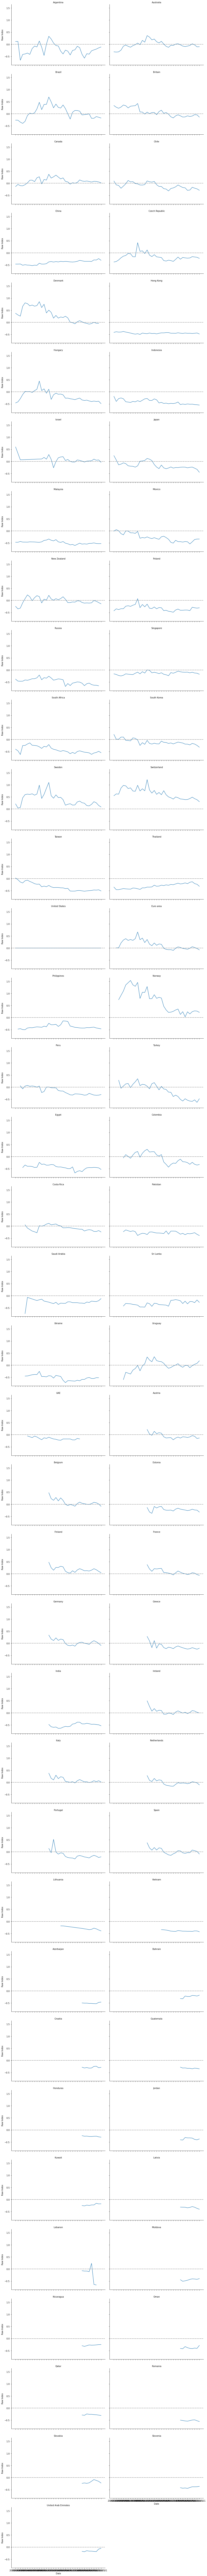

In [26]:
#Facet grid of line plots of the Raw Index for all countries throughout time
raw_grid = sns.FacetGrid(df_new, col = 'name', height = 4.5, aspect = 1.5, col_wrap = 2) #Create facet grid for all data

raw_grid.map(sns.lineplot, 'date', 'raw_index') #Create line plots with each country's data
raw_grid.set_axis_labels('Date', 'Raw Index') #Change axis labels
raw_grid.refline(y = 0.0) #Set reference line for neutral value (0)
raw_grid.set_titles(col_template = '{col_name}') #Set the name of each country as the title for their graphs

plt.show() #Show graph

#### Latest Date

Visualization of the raw valuation index for each country on the latest date in which data was recorded.

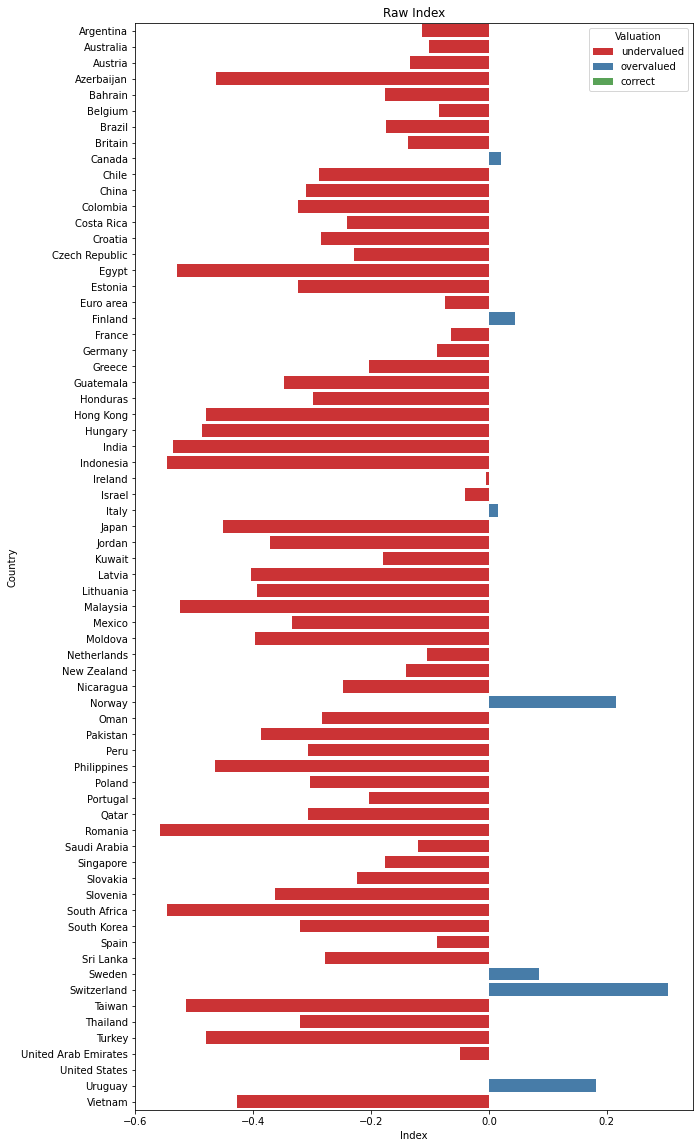

In [27]:
#Raw Index graph for the latest date
plt.figure(figsize = (10, 20)) #set plot size

#create bar plot
sns.barplot(x = df_latest_new['raw_index'], y = df_latest_new['name'], palette = 'Set1', 
                hue = df_latest_new['raw_valuation'], dodge = False).set(xlabel = 'Index', ylabel = 'Country', 
                                                                     title = 'Raw Index')

plt.legend(loc = 'upper right', title = 'Valuation') #Change legend position and label

plt.show() #Show graph

### Adjusted Index

Visualization of the adjusted valuation index for each country on the latest date in which data was recorded.

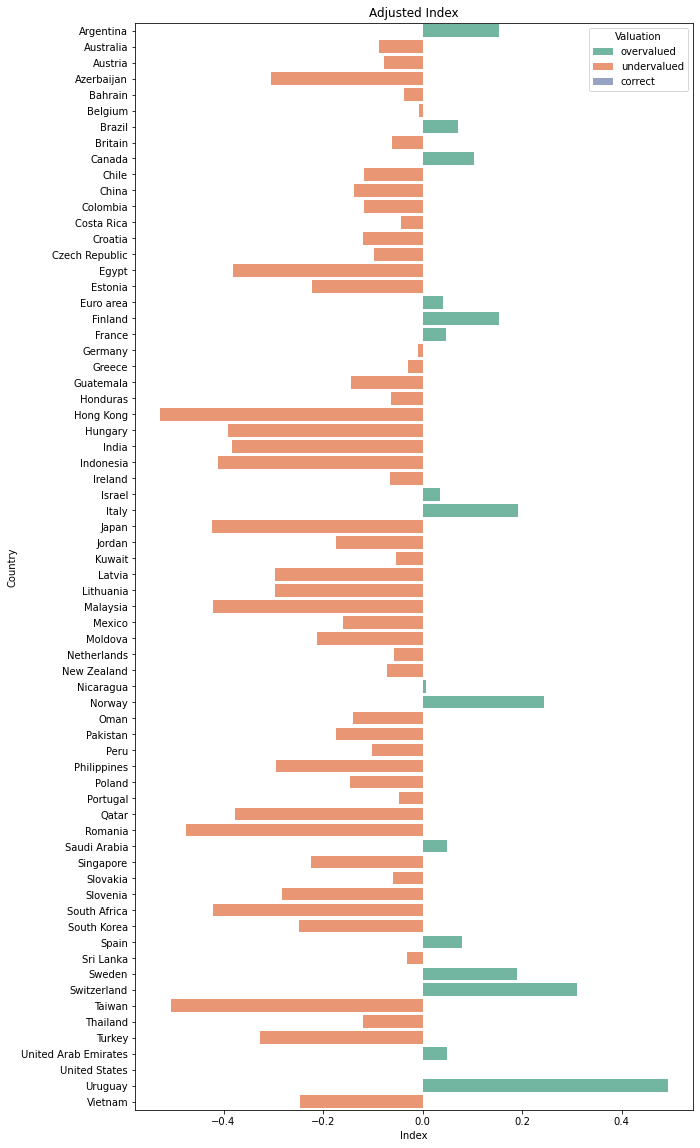

In [28]:
#Adjusted Index graph for the latest date
plt.figure(figsize = (10, 20)) #set plot size

#create bar plot
sns.barplot(x = df_latest_new['adj_index'], y = df_latest_new['name'], palette = 'Set2', 
            hue = df_latest_new['adj_valuation'], dodge = False).set(xlabel = 'Index', ylabel = 'Country', 
                                                                     title = 'Adjusted Index')

plt.legend(loc = 'upper right', title = 'Valuation') #Change legend position and label

plt.show() #Show graph

### Raw vs Adjusted

Comparison of Raw and Adjusted Index for each country on the latest date in which data was recorded.

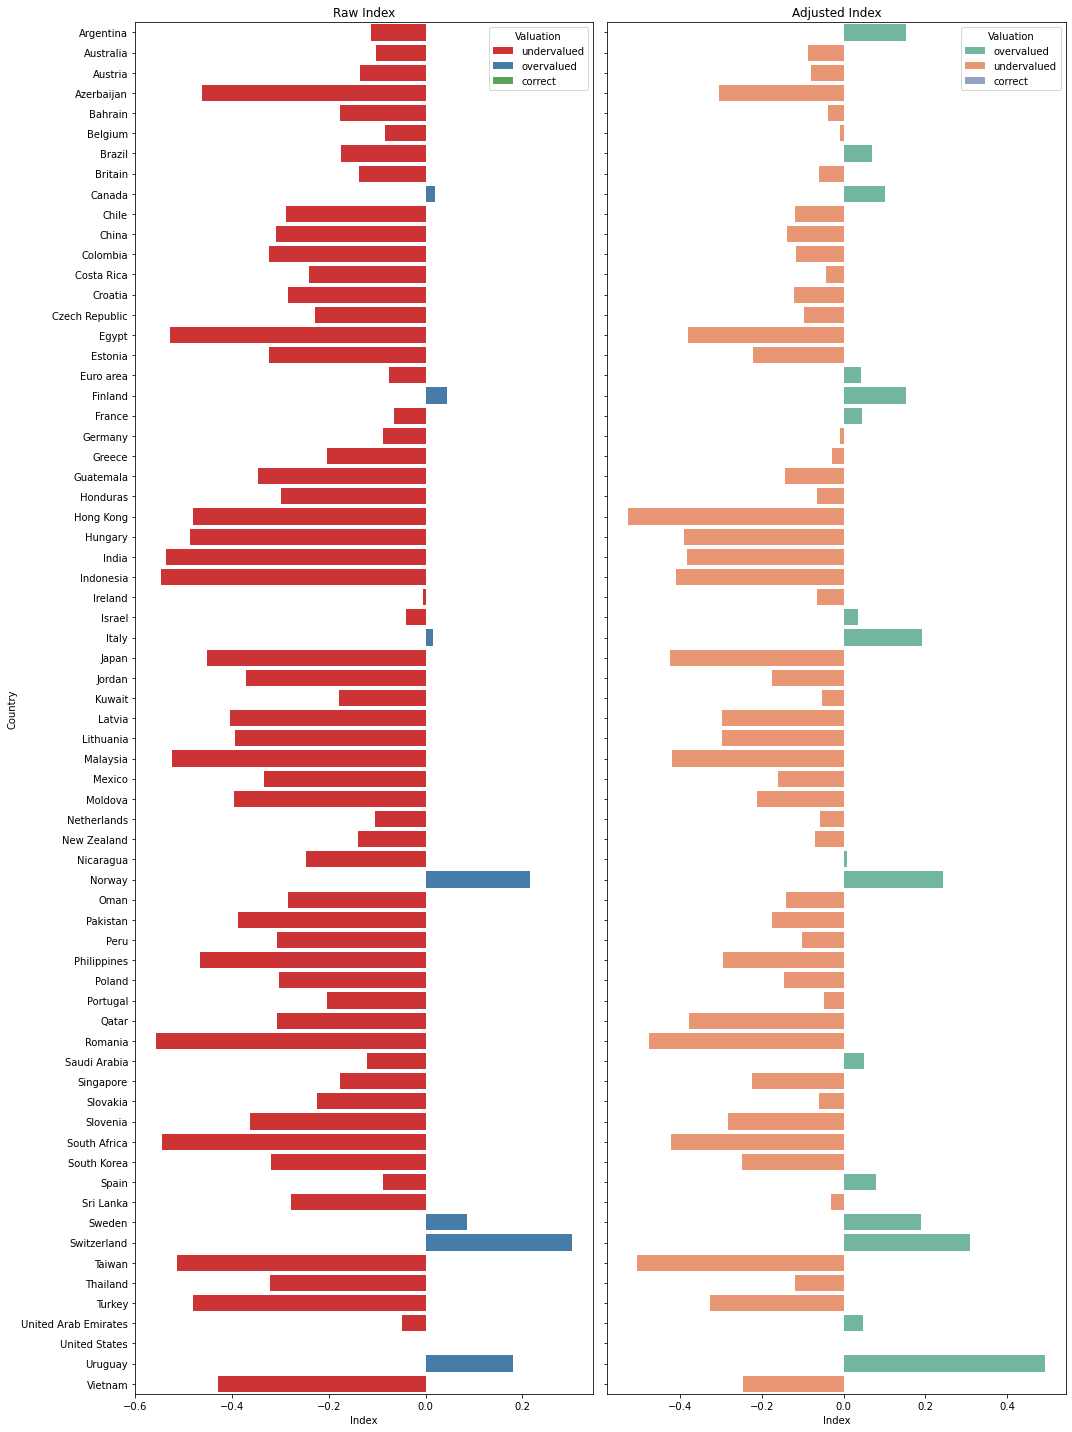

In [29]:
#Show both graphs
f, axs= plt.subplots(1, 2, figsize = (15, 20), sharey = True)

#Raw Index Graph
raw_graph= sns.barplot(x = df_latest_new['raw_index'], y = df_latest_new['name'], palette = 'Set1',
            hue = df_latest_new['raw_valuation'], dodge = False, ax = axs[0])
sns.move_legend(raw_graph, 'upper right', title = 'Valuation') #Set legend position and title
raw_graph.set(xlabel = 'Index', ylabel = 'Country', title = 'Raw Index') #Set axis labels and title

#Adjusted Index Graph
adjusted_graph = sns.barplot(x = df_latest_new['adj_index'], y = df_latest_new['name'], palette = 'Set2', 
            hue = df_latest_new['adj_valuation'], dodge = False, ax=axs[1])
sns.move_legend(adjusted_graph,'upper right', title = 'Valuation') #Set legend position and title
adjusted_graph.set(xlabel = 'Index', ylabel = '', title = 'Adjusted Index') #Set x-axis label, remove y-axis label, set title

#Show graphs side by side
f.tight_layout()

## Future Plans

### Script for Automatic Data Import

Data is updated on The Economist's GitHub every 6-12 months.
The script would automatically import this data.
The way the current code is written, it would automatically change based on this new data.

### Use Historical Data

The Economist has data on Big Mac prices for tons of countries going back decades ago.
GDP and exchange data can be found on sources like the World Bank.
Data from both sources could be merged into a "historical data frame", and then merged into the current dataframe to create a
complete dataframe.

### Use Machine Learning to Forecast Future Changes

With further cleaning and processing, machine learning algorithms (like linear regression) could be used to forecast future changes on purchase power parity for each country/currency.

### Include Inflation Analysis

Use available data to both include inflation in the index calculation, and also perform forecasts on inflation and its effect on the index.

### Make a Map Visualization

Look for patches of under and over valued currencys to find if there is a relation with geographic location.